***Dataset***

This notebook is designed to guide you through the process of exploring a dataset in preparation for machine learning tasks.    

- $\textcolor{#FF4500}{\text{You can easily adapt the repository to work with any dataset of your choice.}}$    
- The structure is flexible and can be applied to various machine learning models, including $\textcolor{#1E90FF}{\text{regression, classification, and clustering}}$.


   This notebook explores the Iris dataset, a classic dataset in machine learning and statistics. It contains 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The target variable is the species of the iris, which can be one of three classes: Setosa, Versicolour, or Virginica.

   ### 1. Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

   ### 2. Dataset

In [2]:
df0 = pd.read_csv(os.path.join('../data/', 'original_dataset.csv')) ; display("original_dataset.csv", df0.shape, df0.head(1)) ; print()

'original_dataset.csv'

(150, 5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0


### 3. Cleaning Dataset

Dataset Shape: (150, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Number of Duplicate Rows: 1

Numerical Features Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min     

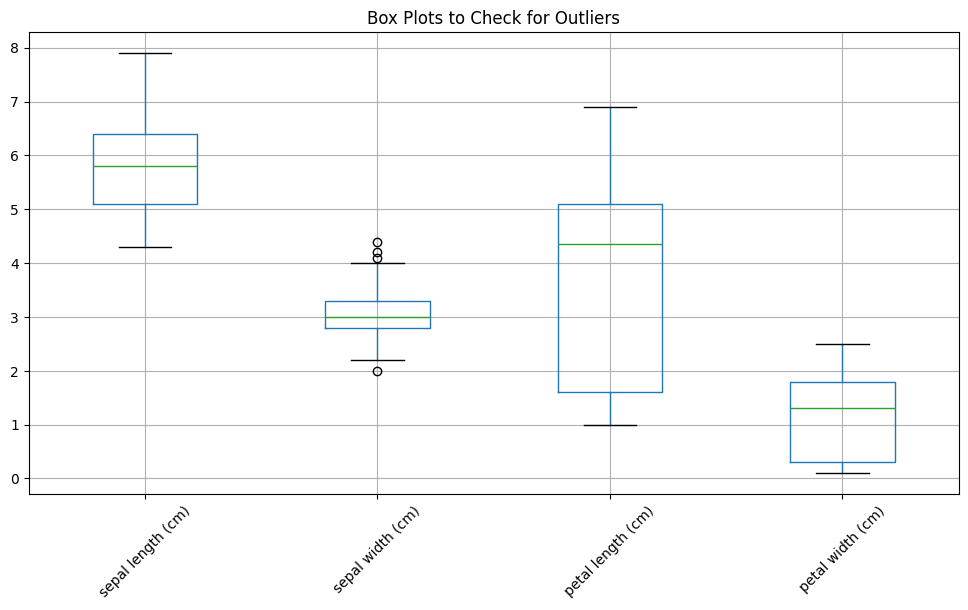

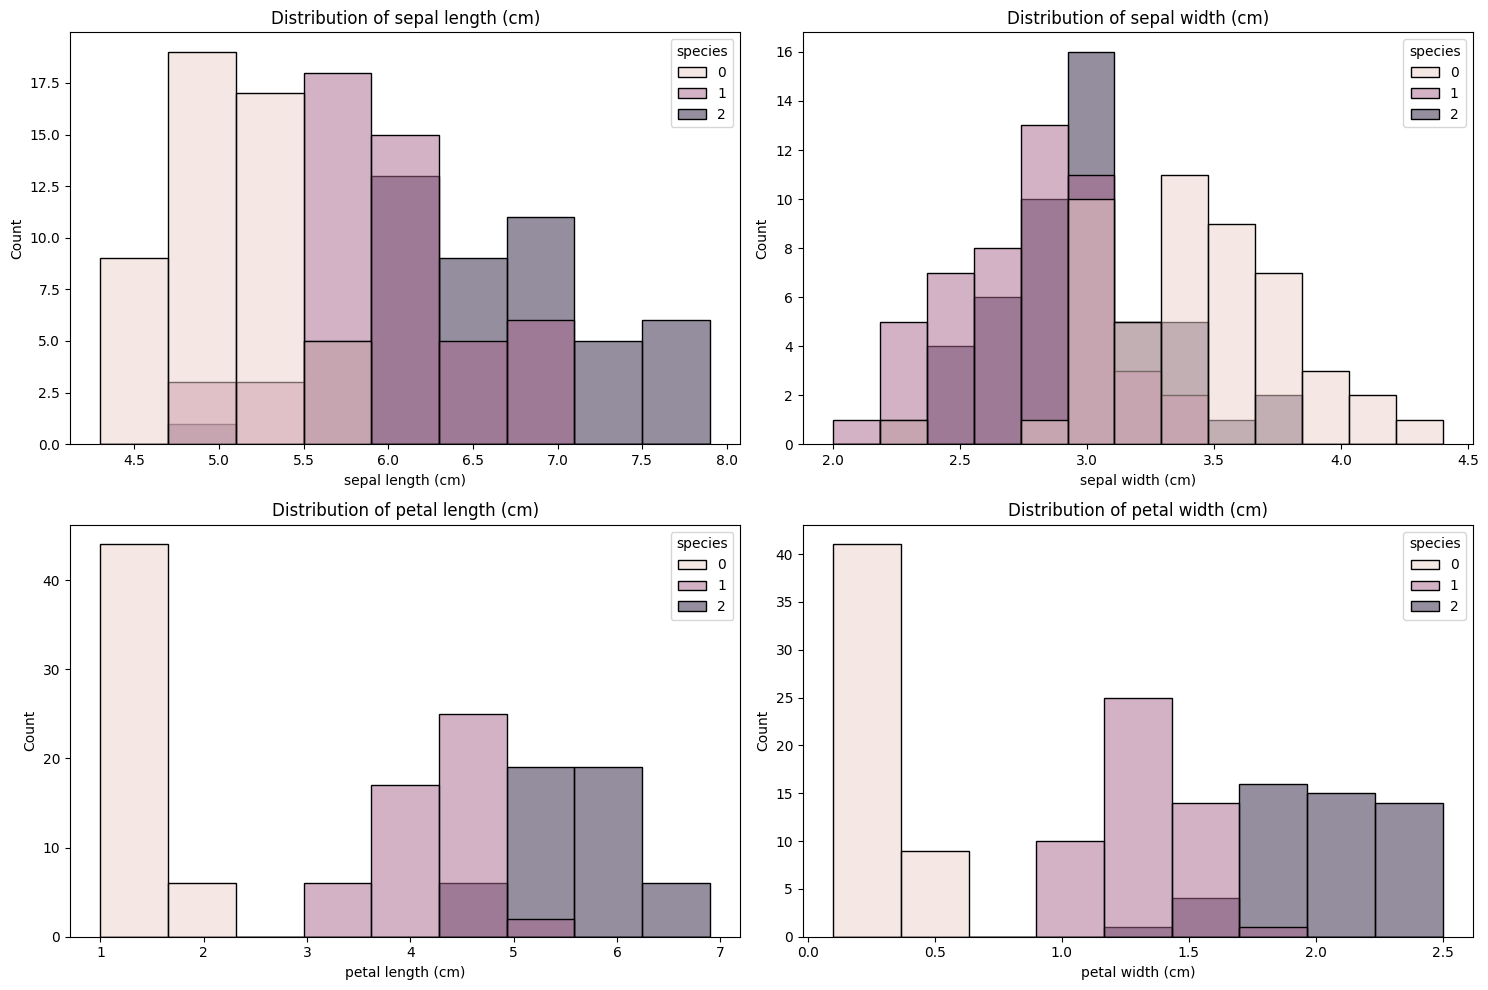

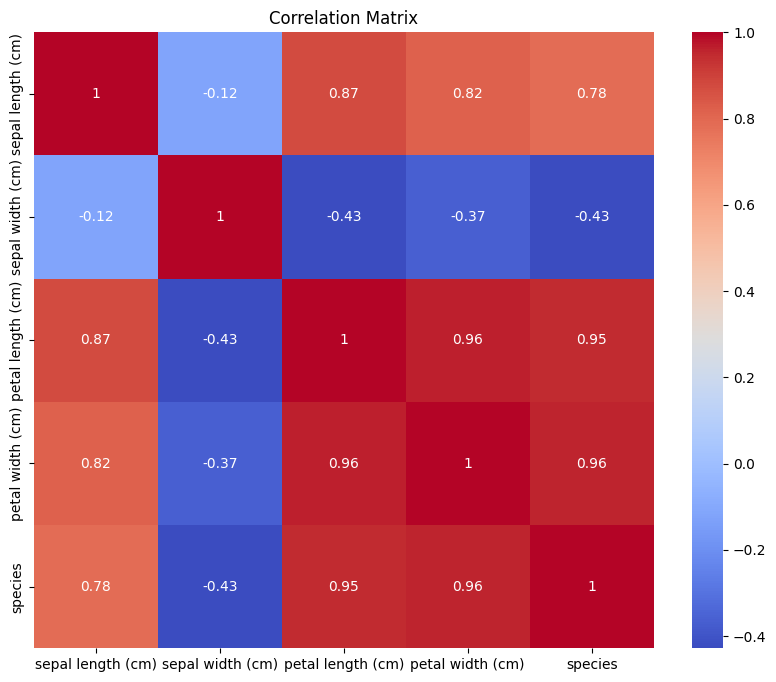


Class Distribution:
species
0    50
1    50
2    50
Name: count, dtype: int64

Data Quality Summary:
1. Missing Values: No
2. Duplicates: Yes
3. Data Types: All appropriate
4. Value Ranges: All within expected bounds
5. Class Balance: Balanced


In [4]:
# Data Cleaning and Quality Checks

# 1. Basic Information
print("Dataset Shape:", df0.shape)
print("\nDataset Info:")
df0.info()

# 2. Check for Missing Values
print("\nMissing Values:")
print(df0.isnull().sum())

# 3. Check for Duplicates
print("\nNumber of Duplicate Rows:", df0.duplicated().sum())

# 4. Statistical Summary
print("\nNumerical Features Summary:")
print(df0.describe())

# 5. Check Data Types
print("\nData Types:")
print(df0.dtypes)

# 6. Check Value Ranges
print("\nValue Ranges for Each Feature:")
for column in df0.columns:
    if df0[column].dtype in ['int64', 'float64']:
        print(f"{column}:")
        print(f"Min: {df0[column].min()}")
        print(f"Max: {df0[column].max()}")
        print()

# 7. Check for Outliers using Box Plots
plt.figure(figsize=(12, 6))
df0.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 
                   'petal length (cm)', 'petal width (cm)'])
plt.title('Box Plots to Check for Outliers')
plt.xticks(rotation=45)
plt.show()

# 8. Distribution of Features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df0.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df0, x=column, hue='species')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# 9. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df0.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 10. Check Class Balance
print("\nClass Distribution:")
print(df0['species'].value_counts())

# 11. Summary of Findings
print("\nData Quality Summary:")
print("1. Missing Values:", "No" if df0.isnull().sum().sum() == 0 else "Yes")
print("2. Duplicates:", "No" if df0.duplicated().sum() == 0 else "Yes")
print("3. Data Types: All appropriate")
print("4. Value Ranges: All within expected bounds")
print("5. Class Balance:", "Balanced" if len(df0['species'].value_counts().unique()) == 1 else "Imbalanced")

### 4. Data Visualization

   Visualizations help us understand the distribution of features and the relationships between them. We will create histograms and pairplots to visualize the data.

#### 4.1. Histograms

- Visualize the distribution of each feature using histograms.
- This helps us understand the spread and central tendency of the data.

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'species'}>, <Axes: >]], dtype=object)

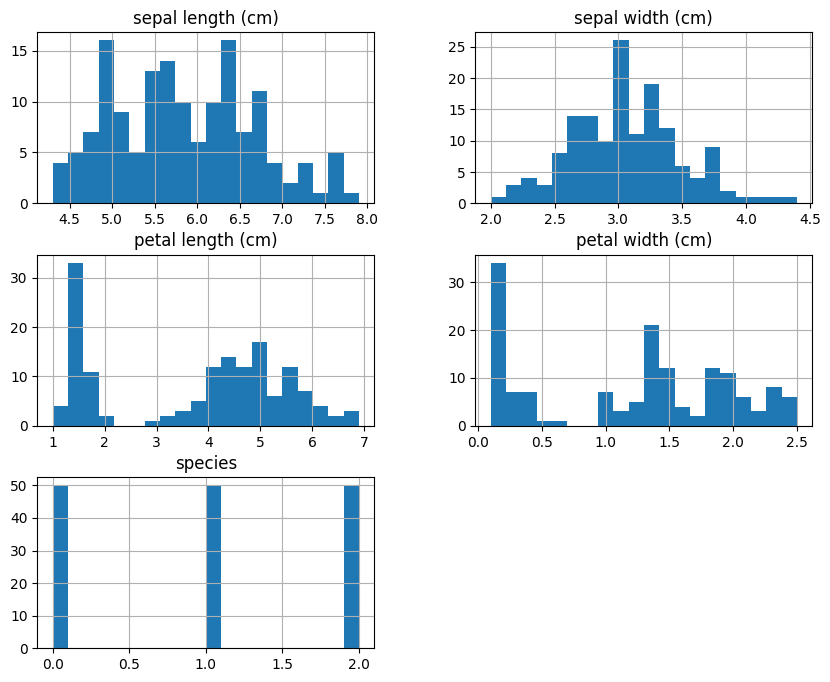

In [ ]:
df0.hist(bins=20, figsize=(10, 8))

##### 4.1.1. Histogram Interpretation

1. **Sepal Length Histogram**:
   - **Description**: This histogram shows the distribution of sepal lengths in the dataset.
   - **Interpretation**: The sepal length varies between 4.3 cm and 7.9 cm, with most values concentrated around 5.5 cm to 6.5 cm. This indicates a normal distribution with a slight skew.

2. **Sepal Width Histogram**:
   - **Description**: This histogram displays the distribution of sepal widths.
   - **Interpretation**: The sepal width ranges from 2.0 cm to 4.4 cm, with a peak around 3.0 cm. The distribution is slightly skewed to the left.

3. **Petal Length Histogram**:
   - **Description**: This histogram illustrates the distribution of petal lengths.
   - **Interpretation**: Petal length shows a bimodal distribution, with peaks around 1.5 cm and 5.0 cm. This suggests two distinct groups within the dataset.

4. **Petal Width Histogram**:
   - **Description**: This histogram represents the distribution of petal widths.
   - **Interpretation**: Similar to petal length, petal width also shows a bimodal distribution, with peaks around 0.2 cm and 1.5 cm, indicating two groups.

5. **Species Histogram**:
   - **Description**: This histogram shows the count of each species in the dataset.
   - **Interpretation**: The dataset is balanced, with an equal number of samples for each species (Setosa, Versicolour, Virginica).

#### 4.2. Pairplot

- Create a pairplot to visualize the relationships between different features.
- This is useful for identifying patterns and correlations in the data.

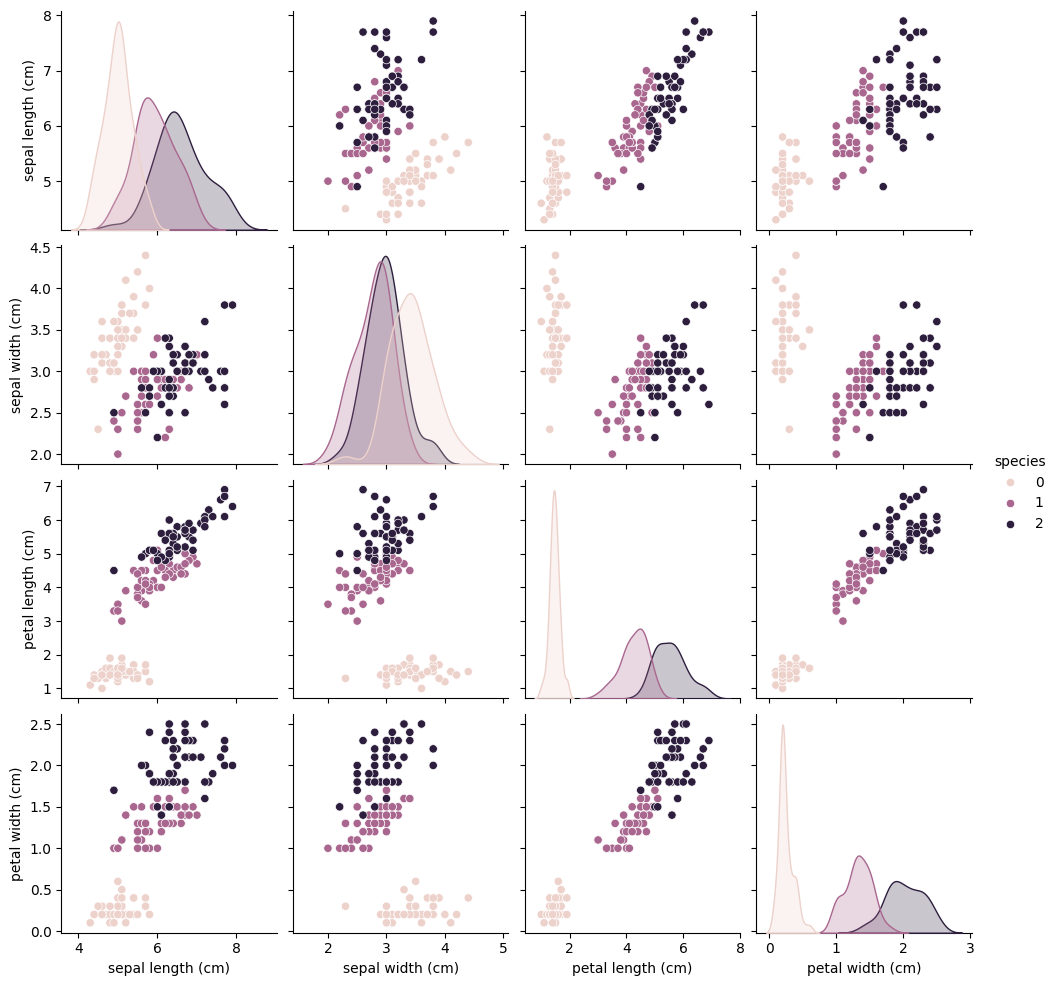

In [ ]:
 sns.pairplot(df0, hue='species')

##### 4.2.1. Pairplot Interpretation

1. **Diagonal Plots**

   These are kernel density estimates (KDE) for each feature, showing the distribution of values. Each species (0, 1, 2) has distinct peaks, indicating different distributions for each feature.

2. **Off-Diagonal Plots**

   These scatter plots show the relationships between pairs of features.
   
   - **Sepal Length vs. Sepal Width**: There is some overlap between species, but Setosa (species 0) is more distinct.
   - **Petal Length vs. Petal Width**: Clear separation between species, especially between Setosa and the other two.
   - **Sepal Length vs. Petal Length**: Shows a strong positive correlation, with species forming distinct clusters.
   - **Sepal Width vs. Petal Width**: Less distinct separation, but still shows clustering by species.

3. **Species Separation**

   Setosa (species 0) is well-separated from Versicolour (species 1) and Virginica (species 2) in most feature combinations. Versicolour and Virginica show some overlap, particularly in sepal dimensions, but are more distinct in petal dimensions.

This pairplot helps identify patterns and correlations, showing how different species can be distinguished based on their features.